In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [101]:
df = pd.read_csv('data/prophetData.csv')
df['ds'] = pd.to_datetime(df['ds'])
df.head()
df = df[-400:]
#df['y'] = df['y']*100

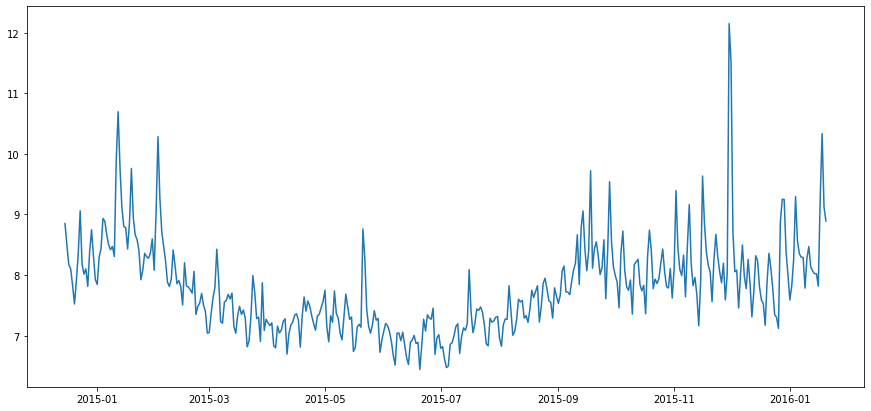

In [102]:
plt.figure(figsize=(15,7))
plt.plot(df['ds'], df['y'])
plt.show();

In [103]:
validation_fraction = 0.2

validation_size = int(df.shape[0] * validation_fraction)
df_train = df.iloc[:-validation_size]
df_validation = df.iloc[-validation_size:]
print(df_train.shape)
print(df_validation.shape)

(320, 2)
(80, 2)


In [104]:
import importlib
import Chronos


In [105]:
importlib.reload(Chronos)
my_cr = Chronos.Chronos(G=400,
                        p_m= 0.1, 
                        r_m = 0.5,
                        yearly_seasonality=5,
                        monthly_seasonality=5)

In [ ]:
my_cr = my_cr.fit(df_train)

0.6823539238907875
population initalized


In [92]:
bla = my_cr.best_individual.copy()
bla

array([ 7.77771830e+00,  8.82583120e-05, -2.84296902e-01, -1.17764398e-01,
       -6.08044886e-02,  1.07140862e-01, -1.37062732e-01,  3.67172241e-03,
       -4.55819989e-02, -1.26825632e-01,  4.64364182e-02, -2.13568018e-02,
       -3.92284609e-02, -2.83686340e-02])

In [93]:
#my_cr.best_individual[1] = 0.001

In [94]:
predict_df = df_train.copy()
predict_df = my_cr.predict(predict_df)
predict_df.head()

,ds,y,yhat
2705,2015-07-04,6.473891,7.782019
2706,2015-07-05,6.499787,7.646271
2707,2015-07-06,6.859615,7.519740
2708,2015-07-07,6.881411,7.734739
2709,2015-07-08,6.997596,7.594778


In [95]:
predict_df.tail()

,ds,y,yhat
2860,2015-12-07,8.496786,7.935906
2861,2015-12-08,7.981050,8.163277
2862,2015-12-09,7.777793,8.122279
2863,2015-12-10,8.260234,7.909886
2864,2015-12-11,7.866339,8.091202


In [96]:
from Chronos import CHRONOS_MSE
CHRONOS_MSE(predict_df['y'], predict_df['yhat'])

0.4394872494921277

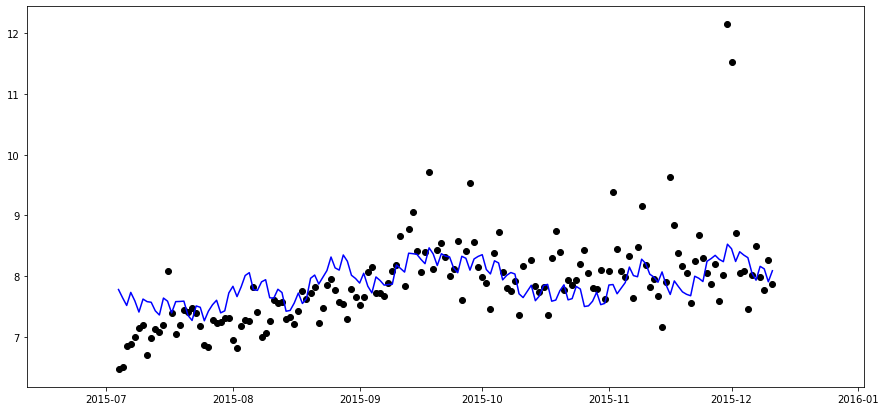

In [100]:
plt.figure(figsize=(15,7))
plt.scatter(predict_df['ds'], predict_df['y'], c="black")
plt.plot(predict_df['ds'], predict_df['yhat'], c="blue")
plt.show();